# Data Science Portfolio - Part II (40 marks)

This question has been created to test your statistical analysis and programming knowledge in Python. 

You are given a `csv` file, which include various data entries for each football match in **English Premier League** during the 2020-2021 season. To name a few of these entries: date, referee name, number of goals, red cards, etc. The `csv` dataset you are provided contains one row per football match. The column names are abbreviations and given as: 

```
Div = League Division
Date = Match Date (dd/mm/yy)
Time = Time of match kick off
HomeTeam = Home Team
AwayTeam = Away Team
FTHG = Full Time Home Team Goals
FTAG = Full Time Away Team Goals
FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
HTHG = Half Time Home Team Goals
HTAG = Half Time Away Team Goals
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)
Referee = Match Referee
HS = Home Team Shots
AS = Away Team Shots
HST = Home Team Shots on Target
AST = Away Team Shots on Target
HF = Home Team Fouls Committed
AF = Away Team Fouls Committed
HC = Home Team Corners
AC = Away Team Corners
HY = Home Team Yellow Cards
AY = Away Team Yellow Cards
HR = Home Team Red Cards
AR = Away Team Red Cards
```


In this exercise, you are asked to perform a number of operations to:

 - perform statistical analysis of the data, and

 - gain insights from the data.

In [190]:
# suggested imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy
from urllib import request
import scipy.stats as stats
from statsmodels import graphics
import arviz as az
import pymc3 as pm
from pymc3 import glm
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, RocCurveDisplay, auc, roc_curve
import seaborn as sns
sns.set_style(style="darkgrid", rc={"axes.facecolor": ".9", "grid.color": ".8"})
sns.set_palette(palette="deep")
sns_c = sns.color_palette(palette="deep")

In [191]:
module_url = f"https://raw.githubusercontent.com/oktaykarakus/cmt309-portfolio/main/EPL_season-2021.csv"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

df = pd.read_csv('EPL_season-2021.csv')
df = df.fillna('')

Fetching https://raw.githubusercontent.com/oktaykarakus/cmt309-portfolio/main/EPL_season-2021.csv


In [192]:
df.head(10)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,2,6,12,12,2,3,2,2,0,0
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,3,5,14,11,7,3,2,1,0,0
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,6,3,9,6,9,0,1,0,0,0
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,3,2,13,7,8,7,2,2,0,0
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1,7,12,9,2,5,1,1,0,0
5,E0,13/09/2020,16:30,Tottenham,Everton,0,1,A,0,0,...,5,4,15,7,5,3,1,0,0,0
6,E0,14/09/2020,20:15,Brighton,Chelsea,1,3,A,0,1,...,3,5,8,13,4,3,1,0,0,0
7,E0,14/09/2020,18:00,Sheffield United,Wolves,0,2,A,0,2,...,2,4,13,7,12,5,2,1,0,0
8,E0,19/09/2020,12:30,Everton,West Brom,5,2,H,2,1,...,7,4,9,11,11,1,1,0,0,1
9,E0,19/09/2020,15:00,Leeds,Fulham,4,3,H,2,1,...,7,6,13,18,5,3,1,2,0,0


## P2.1 - Data Pre-processing and Exploratory Analysis (11 marks)

In this question, your task is to use `pandas` and other required modules to preprocess the data frame, `df`. Preprocessing will include: add/remove/recode columns in `df`. In addition, to further explore the dataset, you need to produce a number of exploratory plots. 

#### P2.1.1 - Add Booking Points Columns (1 marks) 

Sometimes, in order to better analyse any given data set, one can create a new type of feature by combining two or more existing entries of the data frame. In this question, you are asked to create a function `add_booking_pts(df)` which creates two new columns of: **Home booking points (HBP)**, and **Away booking points (ABP)** by using four existing columns of HY, AY, HR, and AR.

The details of the function `add_booking_pts(df)` are given below:

 - Takes the data frame `df` as input.
 
 - For each match, number of yellow cards is weighted with 10 points, whilst the number of red cards is with 25 points. 
 
 - Basically, the function calculates HBP and ABP columns as
    - $HBP = 10\cdot HY + 25\cdot HR$
    - $ABP = 10\cdot AY + 25\cdot AR$
 
 - These newly created arrays are added to `df`, whilst removing the columns for HY, AY, HR, and AR.
 
 - Finally, the updated `df` is returned.

In [193]:
def add_booking_pts(df):
    # your code here
    df['HBP'] = 10*df['HY'] + 25*df['HR']
    df['ABP'] = 10*df['AY'] + 25*df['AR']
    return df
add_booking_pts(df)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HF,AF,HC,AC,HY,AY,HR,AR,HBP,ABP
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,12,12,2,3,2,2,0,0,20,20
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,14,11,7,3,2,1,0,0,20,10
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,9,6,9,0,1,0,0,0,10,0
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,13,7,8,7,2,2,0,0,20,20
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,12,9,2,5,1,1,0,0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,23/05/2021,16:00,Liverpool,Crystal Palace,2,0,H,1,0,...,10,8,14,1,2,2,0,0,20,20
376,E0,23/05/2021,16:00,Man City,Everton,5,0,H,2,0,...,8,10,7,5,2,2,0,0,20,20
377,E0,23/05/2021,16:00,Sheffield United,Burnley,1,0,H,1,0,...,11,1,8,9,3,1,0,0,30,10
378,E0,23/05/2021,16:00,West Ham,Southampton,3,0,H,2,0,...,5,9,2,3,0,3,0,0,0,30


#### P2.1.2 - Convert Table Colums into Digits (2 marks) 

When reading in the dataframe, one can see that it contains some textual data which will not be relevant for the numerical analyses in Question 1. Therefore, implement a function `convert_results(df)` 

1. (1 mark) to convert **half-time results (HTR)** and **full-time results (FTR)** into numerical data. The details of the function are given below: 
 
- HTR and FTR columns include string values of `'H'`, `'D'` and `'A'`. These string corresponds to the cases below:
    - `'H'`: Home team win

    - `'D'`: Draw

    - `'A'`: Away team win

- The function `convert_results(df)` will replace `'H'`, `'D'` and `'A'` values with `int` type values of of 1, 0, -1, respectively.

2. (1 mark) to convert **Time** column into `float` type values in interval of $[0, 24)$. Since an hour has 60 minutes, a 15-minute interval corresponds to quarter of an hour (i.e 0.25 hours). Considering this, some examples can be given:
 
- `'12.30'` will be `12.5`, or 
 
- `'18.15'` will be `18.25` or 
 
- `'17.00'` will be `17.0`
 
The function `convert_results(df)` should return the updated data frame `df`.

In [194]:
def convert_results(df):
    mapp = {'H': 1, 'D': 0, 'A':-1}
    df = df.replace({'HTR': mapp, 'FTR': mapp})  #replacing value with integers

    s = df.Time.str.replace(':' , '.')
    df['Time'] = pd.to_numeric(s)                #replace : by . and converting into numeric format

    num = round(df['Time'])                      #getting the integer part
    dec = (df['Time'] - num)/60 * 100            #getting decimal part and converting into [0.0 to 1.0] interval

    df['Time'] = round((num + dec), 2)           #adding the numerical and new decimal part
    return df
convert_results(df)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HF,AF,HC,AC,HY,AY,HR,AR,HBP,ABP
0,E0,12/09/2020,12.5,Fulham,Arsenal,0,3,-1,0,1,...,12,12,2,3,2,2,0,0,20,20
1,E0,12/09/2020,15.0,Crystal Palace,Southampton,1,0,1,1,0,...,14,11,7,3,2,1,0,0,20,10
2,E0,12/09/2020,17.5,Liverpool,Leeds,4,3,1,3,2,...,9,6,9,0,1,0,0,0,10,0
3,E0,12/09/2020,20.0,West Ham,Newcastle,0,2,-1,0,0,...,13,7,8,7,2,2,0,0,20,20
4,E0,13/09/2020,14.0,West Brom,Leicester,0,3,-1,0,0,...,12,9,2,5,1,1,0,0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,23/05/2021,16.0,Liverpool,Crystal Palace,2,0,1,1,0,...,10,8,14,1,2,2,0,0,20,20
376,E0,23/05/2021,16.0,Man City,Everton,5,0,1,2,0,...,8,10,7,5,2,2,0,0,20,20
377,E0,23/05/2021,16.0,Sheffield United,Burnley,1,0,1,1,0,...,11,1,8,9,3,1,0,0,30,10
378,E0,23/05/2021,16.0,West Ham,Southampton,3,0,1,2,0,...,5,9,2,3,0,3,0,0,0,30


#### P2.1.3 - Fair Play League Table (4 marks) 

Write a function `create_fair_play_table(df)` to depict a **barplot with horizontal bars** representing *total booking points*. The module `seaborn` and its corresponding methods and attributes must be used in this question.

Produce a bar for each team (use the HBP and ABP columns) and plot them in increasing order. The team with the top bar (*i.e.* lowest HBP+ABP) will represent the Fair Play League Champion. Also, print the statement below

```
The champions of the 2020-2021 Fair Play League is {locate the team here}.
```

![](https://drive.google.com/uc?export=view&id=11gYwhu-1D6dxEcmXK31pL5Zcop497w9i)

The champions of the 2020-2021 Fair Play League is Liverpool


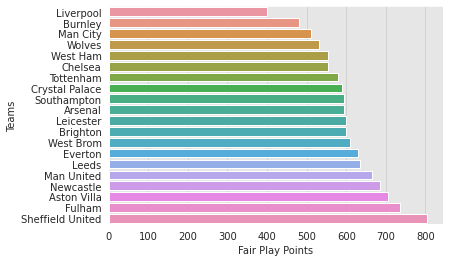

In [195]:
def create_fair_play_table(df):
    newdf = df[['HomeTeam','HBP','AwayTeam', 'ABP']]                                # selecting required columns and adding into new dataframe

    #grouping by, sorting, resetting the index and converting into dictionary format
    x = newdf.groupby(['HomeTeam'], sort=True).agg({'HBP':'sum'}).reset_index()
    x_dict = dict(zip(x.HomeTeam, x.HBP))
    y = newdf.groupby(['AwayTeam'], sort=True).agg({'ABP':'sum'}).reset_index()
    y_dict = dict(zip(y.AwayTeam, y.ABP))



    result = {key: x_dict.get(key, 0) + y_dict.get(key, 0)
          for key in set(x_dict) | set(y_dict)}                                       #merging home and away dictionary into new dictionary
    result = dict(sorted(result.items(), key = lambda x: x[1], reverse = False))      #sorting the dictionary by value



    final = pd.DataFrame(result.items(), columns=['Teams', 'Fair Play Points'])       #converting the dictionary into dataframe and giving new column names
    print("The champions of the 2020-2021 Fair Play League is {}".format(min(result, key=result.get)))
    return(sns.barplot(x = 'Fair Play Points', y = 'Teams', data = final))            #plotting the horizontal barplot
    
df_fp = create_fair_play_table(df)

### P2.1.4 - Expected number of goals vs. Exact scores (4 marks) 

Expected number of goals (xG) is a predictive model used to assess every goal-scoring chance, and the likelihood of scoring. Nowadays, xG has a strong algorithm behind it, but in this example, we will assume two basic models to calculate the xG of any football team for any game:
 
 - $xG_1 = 0.1 \cdot S$
 
 - $xG_2 = 0.1 \cdot S + 0.05\cdot SoT$

where $S$ and $SoT$ is the total number of shoots and total shoots on target, respectively.

Write a function `xG_plot(df)` to plot $xG_1$, $xG_2$ and exact number of goals scored by a randomly selected football team for whole 38 game weeks. 

This exploratory analysis will depict two sub-plots:
 
 1. Running mean of all three variables (xG1, xG2 and Goals). Running mean shows the average of a value up to a time step. For example: running mean of xG1 for week 5 is $\frac{1}{5}\sum_{i=0}^{4}xG1_{i}$, or similarly for week 17 is $\frac{1}{17}\sum_{i=0}^{16}xG1_{i}$.

 2. Cumulative sum of all three variables (xG1, xG2 and Goals). (Hint: `np.cumsum()`)

Use different colours, line styles, legends, etc. to make the exploratory analysis more understandable. The function also returns calculated xGs for the randomly selected team in a `dict` type object of form `{team : (xG1, xG2)}`

![](https://drive.google.com/uc?export=view&id=1Y3uSzRQaKumgoKoNdkohYBhpgBrOkYeO)

{'Liverpool': [{0: 2.2, 1: 1.8, 2: 2.1, 3: 1.4, 4: 2.2, 5: 1.7, 6: 0.9, 7: 1.0, 8: 2.4, 9: 0.6, 10: 1.1, 11: 1.2, 12: 1.7, 13: 1.4, 14: 1.7, 15: 1.1, 16: 1.7, 17: 1.7, 18: 2.7, 19: 1.4, 20: 1.4, 21: 1.1, 22: 0.8, 23: 1.5, 24: 1.5, 25: 1.6, 26: 0.7, 27: 1.6, 28: 1.2, 29: 1.6, 30: 2.3, 31: 1.7, 32: 2.2, 33: 1.4, 34: 1.7, 35: 2.6, 36: 2.0, 37: 1.9}, {0: 2.5, 1: 2.1, 2: 2.5, 3: 1.8, 4: 2.6, 5: 1.95, 6: 1.15, 7: 1.15, 8: 3.05, 9: 0.7, 10: 1.4, 11: 1.5, 12: 2.25, 13: 1.8, 14: 1.8, 15: 1.3, 16: 1.75, 17: 1.85, 18: 3.0, 19: 1.75, 20: 1.65, 21: 1.15, 22: 0.95, 23: 1.7, 24: 1.8, 25: 2.0, 26: 0.75, 27: 1.75, 28: 1.4, 29: 1.95, 30: 2.8, 31: 2.05, 32: 2.65, 33: 1.7, 34: 2.1, 35: 2.9, 36: 2.15, 37: 2.15}]}


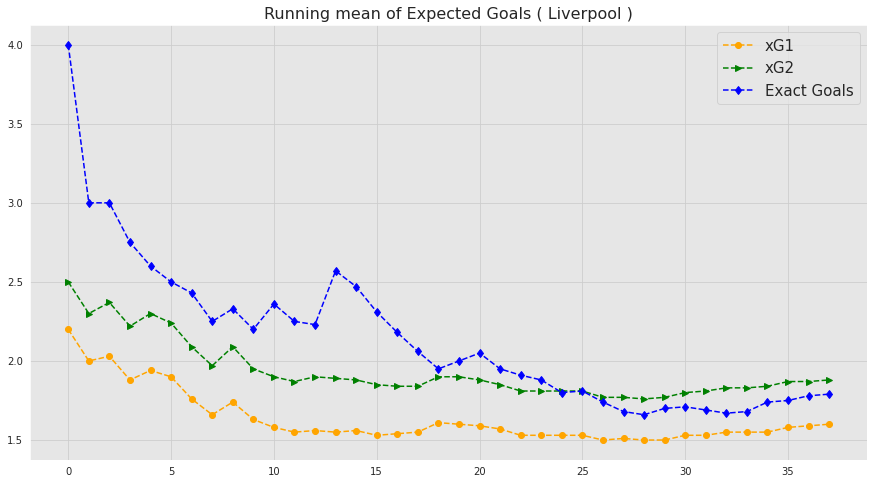

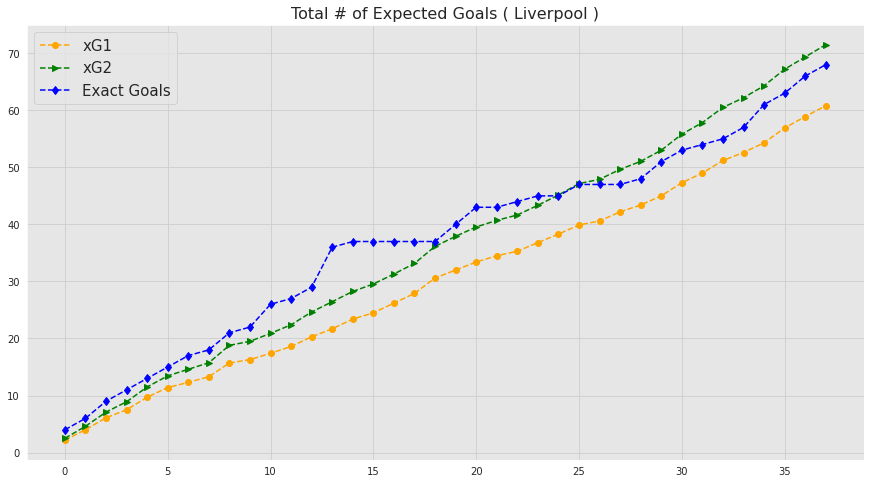

In [196]:
def xG_plot(df):
  ran = df['HomeTeam'].sample().values[0]                                    #selecting random team

  HT = df[df['HomeTeam'] == ran][['HomeTeam', 'HS']]                         #matching random team with teams in HomeTeam and AwayTeam
  AT = df[df['AwayTeam'] == ran][['AwayTeam', 'AS']]
  xG1 = pd.concat([HT['HS'], AT['AS']], axis=0).sort_index() * 0.1           #concat from HT and AT, sorting index and multiplying by 0.1
  xG1 = round(xG1.reset_index(drop = True),2)                                #XG1 MAIN, rounding upto 2 decimals
  xG1rm = round(xG1.expanding().mean(),2)                                    #runnimg mean of xG1, rounding to 2 decimal 
  xG1cs = round(xG1.cumsum(),2)                                              #cumilative sum of xG1,rounding to 2 decimal


  #SAME PROCESS for Shots on target of randomly selected team from HomeTeam and AwayTeam column
  HsT = df[df['HomeTeam'] == ran][['HomeTeam', 'HST']]
  AsT = df[df['AwayTeam'] == ran][['AwayTeam', 'AST']]
  xG2 = ((pd.concat([HT['HS'], AT['AS']], axis=0).sort_index() * 0.1) + (pd.concat([HsT['HST'], AsT['AST']], axis=0).sort_index() * 0.05)) #calculation as per question
  xG2 = round(xG2.reset_index(drop = True),2)                                #XG2 MAIN,  rounding upto 2 decimals
  xG2rm = round(xG2.expanding().mean(),2)                                    #runnimg mean of xG2, rounding to 2 decimal 
  xG2cs = round(xG2.cumsum(),2)                                              #cumilative sum of xG2,rounding to 2 decimal


  #SAME PROCESS for Full Time goals on target of randomly selected team from HomeTeam and AwayTeam column
  fthg = df[df['HomeTeam'] == ran][['HomeTeam', 'FTHG']]
  ftag = df[df['AwayTeam'] == ran][['AwayTeam', 'FTAG']]
  gls = pd.concat([fthg['FTHG'], ftag['FTAG']], axis=0).sort_index()
  gls = gls.reset_index(drop = True)                                         #GOALS MAIN
  goalsrm = round(gls.expanding().mean(),2)                                  #runnimg mean of xG2, rounding to 2 decimal 
  goalscs = round(gls.cumsum(),2)                                            #cumilative sum of xG1,rounding to 2 decimal

  plt.figure(figsize=(15, 8))                                                #plot running mean by using different markers and setting legend in a specific position
  plt.title("Running mean of Expected Goals ( %s )" % (ran), fontsize=16)
  xG1rm.plot(linestyle='--', marker='o',color = 'orange')
  xG2rm.plot(linestyle='--', marker='>',color = 'green')
  goalsrm.plot(linestyle='--', marker='d',color = 'blue')
  plt.legend(["xG1", "xG2", "Exact Goals"], loc = 'upper right',fontsize=15)

  plt.figure(figsize=(15, 8))                                                #plot cumilative sum by using different markers and setting legend in a specific position
  plt.title("Total # of Expected Goals ( %s )" % (ran), fontsize=16)
  xG1cs.plot(linestyle='--', marker='o',color = 'orange')
  xG2cs.plot(linestyle='--', marker='>',color = 'green')
  goalscs.plot(linestyle='--', marker='d',color = 'blue')
  plt.legend(["xG1", "xG2", "Exact Goals"], loc = 'upper left',fontsize=15)  

  d = ({ran:[xG1.to_dict(), xG2.to_dict()]})                                 #printing dictionary of xG1 and xG2
  print(d) 

xG = xG_plot(df)

## P2.2 - Statistical Analysis (29 marks)

#### P2.2.1 - Model selection for Regression Analysis (9 marks)

In this question, we construct a regression analyses to investigate how well FTHG (or FTAG) can be predicted from the other variables in the dataframe. The objective of this question is to derive a sparse model (linear and polynomial) with fewer variables. 

#### P2.2.1.1 - Variable Selection for Linear Regression (5 marks)

In **variable selection** ('variable' means the same as 'predictor'), variables get iteratively added or removed from the regression model. Once finished, the model typically contains only a subset of the original variables. It makes it easier to interpret the model, and in some cases it makes it generalise better to new data. 

To perform variable selection, create a function `select_variable(df, main_pred, main_target, alpha)`, where 
 
 - `main_pred` is a dictionary of variables. For this analysis, firstly, either all Home or Away teams will be marked and the predictors given below will be used

  - Home: [Time, FTR, HTHG, HTR, HS, HST, HF, HC, HBP]
  
  - Away: [Time, FTR, HTAG, HTR, AS, AST, AF, AC, ABP]. 
 
 - `main_target` is the variable for the regression, Home: FTHG (or Away: FTAG)
 
 - `alpha` is the significance level for selecting significant predictors

The function should return

 - `main_pred` is the dictionary which stores the selected subset of initial `main_pred` both for home and away teams, in a format of `main_pred = {'Home': [... selected predictors here ...], 'Away': [... selected predictors here ...]}`.

To calculate regression fits and $p$-values you will use `statsmodels`. The general procedure follows two stages:

 - Stage 1 (adding predictors): you build a model by adding variables one after the other. You keep adding variables that increase the **adjusted $R^2$** value (provided by `statsmodels` package). 
  
  - Start with an empty set of variables
  
  - Fit multiple one-variable regression models. In each iteration, use one of the variables provided in predictors. The variable that leads to the largest increase in adjusted $R^2$ is added to the model.
  
  - Now proceed by adding a second variable into the model. Starting from the remaining variables, again choose the variable that leads to the largest increase in adjusted $R^2$.
  
  - Continue in the same way for the third, fourth, … variable.
  
  - You are finished when there is no variable left that increases adjusted $R^2$.
 
 - Stage 2 (removing non-significant predictors): if any of the utilised predictors are not significant, you need to remove them. Keep removing variables until all variables in the model are significant.

  - Start by fitting a model using the variables that have been added to the model in Stage 1.
  
  - If there is a variable that is not significant, remove the variable with the largest $p$-value and fit the model again with the reduced set of variables.
  
  - Keep removing variables and re-fitting the model until all remaining variables are significant.
  
  - The remaining significant variables are the output of your function.

In [197]:
# def select_variable(df, main_pred, main_target, alpha):
#     # your code here
#     return main_pred

#### P2.2.1.2 - Model Selection for Polynomial Regression (4 marks)

Often the dataset provided is not linearly separable and a simple linear regression model may not be able to derive relationships between both the independent and dependent variables. In such cases, a possible solution would be to implement polynomial regression instead (https://en.wikipedia.org/wiki/Polynomial_regression). Polynomial regression is a form of regression analysis in which the relationship between the independent variable $x$ and the dependent variable $y$ is modelled as an $n^{th}$ degree polynomial in $x$.

**Example:** Given $y$ the dependent variable, $x_1, x_2$ the independent variables, $b_0$ the bias and $b_1,b_2,...,b_n$ the weights a polynomial regression of degree 2 would have the form:

$$y = b_0 + b_1x_1 + b_2x_1^2 + b_3x_2 + b_4x_2^2$$

Implement a function `polynomial_model(df, main_pred, main_target, degrees)` which uses the selected subset of variables as an argument from the function `select_variable()`, and calculates all possible combinations of the variable set and polynomial degrees. The function `polynomial_model()` finds the degree that yields the best polynomial model (according to the adjusted R-squared metric) to predict the value of a FTHG or FTAG as in the linear regression part above.

Arguments and outputs of the function are given as

 - a dataframe `df`, 

 - a dictionary `main_pred` indicating the predictors for home and away, 
 
 - a dictionary `main_target` indicating target variable for home and away, 
 
 - a list of integers indicating the degrees to test degrees, 
 
The function should return 

 - the best fitted regression model, and best polynomial degree for home and away in a dictionary `main_predp` of format `main_predp = {'Home': (best_fit, best_degree), 'Away': (best_fit, best_degree)}`..

In [198]:
def polynomial_model(df, main_pred, main_target, degrees):
    # your code here
    return main_predp

#### P2.2.2 - Predicting Match Result (5 marks)


Create a function `predict_result()` which predicts the result of **Man City - Everton** football match which was played on 23/05/2021. In order to do this, firstly crop last last 10 rows of the data frame `df` to use only the first 37 weeks (370 matches) of the season to fit your regressors.

The function `predict_result()` will use `select_variable()` and `polynomial_model()` function outputs as the best linear and polynomial regression models. Then by using these two models, it predicts the number of goals scored by Home and Away teams separately, which will lead to the result of the match. Finally, print the information below:

```
Linear regression prediction        : Man City x - y Everton
Polynomial regression prediction    : Man City a - b Everton
Correct result                      : Man City 5 - 0 Everton
```

In [199]:
def predict_result(df, main_pred, main_predp, team1 = 'Man City', team2 = 'Everton'):
    # your code here
    return 0

#### P2.2.3 - Maximum likelihood estimation (MLE) and prediction (10 marks)

In this question, you are expected to solve a regression problem, but this time using **maximum likelihood estimation (MLE)** theory. You need to construct a regression analysis to investigate how well the **full time results (FTR)** can be predicted from the other variables of FTHG, HS, HC, AS, AC. 

#### P2.2.3.1 - ML Estimate of regression parameters (7 marks)

Create a function `ML_estimate(df_est, pred, target)` which calculates the 

1.   List item
2.   List item

ordinary least squares (OLS) and two MLE fits (Poisson and Probit) for the given arguments.

You need to use `statsmodels` module and its corresponding methods of `.OLS()`, `.Poisson()` and `.Probit()`.

- `df_est` is a subset of the data frame `df` which includes **randomly selected** 280 rows of `df`. The remaining 100 rows will be used in prediction application (see below).

- `pred` is a list of variables. For this analysis, OLS and other models utilise the predictors of FTHG, HS, HC, AS, AC. (Note: Depending on your implementation, you might need to add a constant to the predictors. Please see the lecture notes)

- `target` is the target variable for the regression, FTR. You need to adjust values of this column for the purpose of this question. 
 
  - FTR = 1.0 if Home team wins.
  
  - FTR = 0.0 if Away team wins or a Draw.

The function should return variables 

 - `MLE_model_fits` a `tuple` object which stores all three model fits `statsmodels` objects for OLS, Probit and Poisson.

In [200]:
row, col = df.shape
test_idx = np.random.choice(row, 100, replace=False)                       #100 random rows selected
training_idx = np.setdiff1d(np.arange(row), test_idx, assume_unique=True)  #rest 280 rows
df_est = df.copy().iloc[training_idx]                                      #creating dataframe with training index
df_pred_ti = df.copy().iloc[test_idx]                                      #creating dataframe with testing index

pred = ['FTHG', 'HS', 'HC', 'AS', 'AC']                                    #the list as per mentioned in the question
target = ['FTR']                                                           #target variable
''' The part above is done only for testing purpose because not sure how this function is being tested, as there are parameters for the default function, the pred and target lists are manually created '''


def ML_estimate(df_est, pred, target):
  df_est['const'] = 1.0                                       #added the constant
  pred = pred.copy()                                          #copied the pred
  pred.append('const')                                        #appended the constant to the pred list

  mapp = {'H': 1.0,'D':0.0, 'A':0.0}
  df_est = df_est.replace({'FTR': mapp})                      #replaced variables in FTR by numbers as mentioned in the question


 #Used the sm functions from the demo program from the lectures
  sm_ols = sm.OLS(df_est[target], df_est[pred]).fit()         
  sm_pois = sm.Poisson(df_est[target], df_est[pred]).fit()
  sm_probit = sm.Probit(df_est[target], df_est[pred]).fit()

  return(sm_ols, sm_pois, sm_probit)

ML_estimate(df_est, pred, target)

Optimization terminated successfully.
         Current function value: 0.586080
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.307463
         Iterations 7


(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7f09ec9c0910>,
 <statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x7f09eca87bd0>)

#### P2.2.3.2 - Predicting Home Win via MLE (3 marks)

Create a function `ML_predict(df_pred, MLE_model_fits)` which calculates FTR predictions for all three models of OLS, Probit and Poisson.

You need to use `statsmodels`' method for prediction: `.predict()`.

- `df_pred` is a subset of the data frame `df` which includes only a subset of 100 rows of `df`.

- `MLE_model_fits` is a `tuple` object obtained from the `ML_estimate()` function above. Unpack this argument to obtain `statsmodels` objects for all three models. 

This function should return: 

 - `df_pred`

 - `MLE_model_predictions` is a `tuple` which stores the predicted outputs for each three models.  

In [201]:
MLE_model_fits = ML_estimate(df_est, pred, target)         #run previous functions toget return values
df_pred_ti = df_pred_ti[pred]                              #df_pred dataframe created with pred variable list as in previous question
df_pred = df_pred_ti.copy()                                #copied the variable into new variable df_pred to avoid  - copy warning

def ML_predict(df_pred, MLE_model_fits):
    df_pred['const'] = 1                                   #added constant to df_pred
    (sm_ols, sm_probit, sm_pois) = MLE_model_fits          #unpacked the return values from previous function


    ''' prediction functions from the demo program from the lectures '''
    pred_ols = sm_ols.predict(df_pred)
    pred_probit = sm_probit.predict(df_pred)
    pred_pois = sm_pois.predict(df_pred)

    MLE_model_predictions = (pred_ols, pred_probit, pred_pois)  #stored values as a tuple
    return df_pred, MLE_model_predictions                       #returned df_pred and predictions

ML_predict(df_pred, MLE_model_fits)
#ML_estimate output is printed by default when called on the 1st line

Optimization terminated successfully.
         Current function value: 0.586080
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.307463
         Iterations 7


(     FTHG  HS  HC  AS  AC  const
 137     2  10   5   9   0      1
 172     1  15   7  10   4      1
 313     1  18  11   3   1      1
 363     2  17   6   7   5      1
 368     0  10   6  20   7      1
 ..    ...  ..  ..  ..  ..    ...
 284     1  15   6   7   3      1
 198     2   5   2  12   3      1
 276     1  12   2  15   2      1
 9       4  10   5  14   3      1
 180     2   8   6   9   3      1
 
 [100 rows x 6 columns], (137    0.496671
  172    0.294769
  313    0.381171
  363    0.604824
  368   -0.075430
           ...   
  284    0.332009
  198    0.501827
  276    0.151213
  9      0.940534
  180    0.564528
  Length: 100, dtype: float64, 137    0.327751
  172    0.231573
  313    0.326615
  363    0.476455
  368    0.087930
           ...   
  284    0.267359
  198    0.329361
  276    0.135669
  9      0.716878
  180    0.418306
  Length: 100, dtype: float64, 137    0.480822
  172    0.200282
  313    0.363694
  363    0.769686
  368    0.003544
           ...   
  28

#### P2.2.4 - Evaluating Prediction Performance (5 marks)

You will now need to visualise the prediction performance of the models, and evaluate them in terms of prediction accuracy, and mean square error (MSE) metrics. For this purpose, create a function `prediction_perf(gt, MLE_model_predictions)` which evaluates the prediction performance of the reference models. Up to this point, you should have obtained

 - $N = 100$ samples of predictions from each model, stored in `MLE_model_predictions`.
 
 - The ground-truth FTR values from data frames `df`, stored in `gt`.

Assume predicted values for a given model are stored in a variable $P$ and its average is $\bar{P}$. The first performance measure will be the MSE, and will be calculated for each model from the expression below:

$$ MSE = \dfrac{1}{N}\sum_{i=0}^{N-1} (P_i - FTR_i)^2$$

In order to obtain the prediction accuracy for each model, you first should convert continuous prediction results into the binary form (either 1.0 or 0.0). The binarisation process will follow the piecewise function below:

  $$P_{binary, i} = \begin{cases} 1.0, & P_i \geq \bar{P}\\ 0.0, & \text{otherwise}  \end{cases} \quad \text{where} \quad i = 0, 1, \dots, 99$$

Then the percentage accuracy, $Acc\%$ is calculated as

$$ Acc\% = 100 - \sum_{i=0}^{99} |P_{binary, i} - FTR_i|$$

Following these, by using `sklearn` module methods `roc_curve()` and `auc()` find ROC curve parameters and AUC metric for each prediction model. 

In order to obtain performance analysis results in a neatly way, you then need to create a new `pandas` dataframe `df_results` which will be in the form of

```
+----+-------------+--------+--------+-------+
|    | Model       |   Acc% |    MSE |   AUC |
+====+=============+========+========+=======+
|  0 | OLS         |  77.00 | 0.1260 | 0.911 |
+----+-------------+--------+--------+-------+
|  1 | MLE-Probit  |  81.00 | 0.1086 | 0.911 |
+----+-------------+--------+--------+-------+
|  2 | MLE-Poisson |  76.00 | 0.1490 | 0.884 |
+----+-------------+--------+--------+-------+
```

Consequently, using `sklearn` method `RocCurveDisplay()`, the `prediction_perf()` function should 

 - `print` and `return` the data frame `df_results`.

**Marking for this question**
 - (2 marks) Calculating MSE and $Acc\%$ metrics correctly.
 - (3 marks) Creating and returning dataframe `df_results`.
 
with a condition that all these three operations are performed in a **fully working `prediction_perf()` function**.

In [204]:
x,MLE_model_predictions = ML_predict(df_pred, MLE_model_fits)  #storing return values in 2 variables
gt = df[target].iloc[test_idx]                                 #creating gt from test index with target column

def prediction_perf(gt, MLE_model_predictions):

  mapp = {'H': 1,'D':0, 'A':0}
  gt = gt.replace({'FTR': mapp})                               #replacing variables of FTR by numbers

  gt=gt.squeeze()                                              #coverting to series for further compuatation as MLE_model_predictions return values are in series
  pred_ols, pred_probit, pred_pois = MLE_model_predictions     #storing return values in variables

  ''' MSE functions for all variables '''
  MSE_ols = np.round(np.mean((pred_ols - gt)**2), 4)
  MSE_p = np.round(np.mean((pred_probit - gt)**2), 4)
  MSE_po = np.round(np.mean((pred_pois - gt)**2), 4)

  ''' Functions to convert into binary(int) '''
  pred_ols2 = (pred_ols >= np.mean(pred_ols)).astype("int")
  pred_pois2 = (pred_pois >= np.mean(pred_pois)).astype("int")
  pred_probit2 = (pred_probit >= np.mean(pred_probit)).astype("int")

  ''' Accuracy functions for all variables '''
  ao = np.round(100*accuracy_score(y_true=gt, y_pred=pred_ols2), 2)
  ap = np.round(100*accuracy_score(y_true=gt, y_pred=pred_probit2), 2)
  apois = np.round(100*accuracy_score(y_true=gt, y_pred=pred_pois2), 2)
 
  ''' Using roc_curve and AUC for each prediction '''
  a1,b1,c1 = roc_curve(gt, pred_ols2)
  auc_ols = auc(a1,b1)
  a2,b2,c2 = roc_curve(gt, pred_pois2)
  auc_pois = auc(a2,b2)
  a3,b3,c3 = roc_curve(gt, pred_probit2)
  auc_pro= auc(a3,b3)
  
  ''' storing all results in dictionary format'''
  df_results = {'Model':['OLS', 'MLE-Pro', 'MLE-Poi'], 
                           'Acc%':[ao, ap, apois], 
                           'MSE':[MSE_ols, MSE_p, MSE_po],
                            'AUC':[auc_ols,auc_pois,auc_pro]}
                            
  df_results = pd.DataFrame.from_dict(df_results)           #converting into dataframe as required in the question
  print(df_results)
  return df_results                                         # as mentioned - print and return

prediction_perf(gt, MLE_model_predictions)

<class 'pandas.core.series.Series'>
     Model  Acc%     MSE       AUC
0      OLS  74.0  0.1795  0.733333
1  MLE-Pro  71.0  1.9792  0.755556
2  MLE-Poi  76.0  0.1623  0.679798


,Model,Acc%,MSE,AUC
0,OLS,74.0,0.1795,0.733333
1,MLE-Pro,71.0,1.9792,0.755556
2,MLE-Poi,76.0,0.1623,0.679798
